# Final Project Report

* Class: DS 5100
* Student Name: Kristian Olsson
* Student Net ID: kno5cac
* This URL: https://github.com/kristianolsson23/kno5cac_ds5100_montecarlo/blob/main/die_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd
import random
from collections import Counter

class Die:
    '''
    PURPOSE: The Die class imitates an n-sided die. The die has one behavior, which is to be rolled one or more times.
    '''

    def __init__(self, sides):
        '''
        PURPOSE: This method initiates a Die object. Each side is given a default weight of 1, which can be changed after the Die object is initiated. 
     
        INPUTS: 
        sides       NumPy array - containing the sides (face-values) of the Die object. The face-values must be distinct. The face-values must be integers or strings. 
        '''
        if type(sides) != np.ndarray:
            raise TypeError("The input must be a NumPy array.")
        unique_elements = np.unique(sides)
        if len(sides) != len(unique_elements):
            raise ValueError("The input array must have all distinct values.")
        else:
            self.sides = sides 
            self.weights = [1]*len(sides)
            self.dieweights = pd.DataFrame({'weights': self.weights}, index=self.sides)
            self.dieweights = self.dieweights.rename_axis('faces')

    def change_weight(self, face, new_weight):
        '''
        PURPOSE: This method changes the weight of a face-value of the Die. 

        INPUTS: 
        face        string or integer - the face you want to change the weight of.
        new_weight  integer - the new weight for the designated face. 
        '''
        if face not in self.sides: 
            raise IndexError("The input face value does not match any face value of your die.")
        if not isinstance(new_weight, (int, float)):
            try:
                new_weight = float(new_weight)
            except ValueError:
                raise TypeError("The input weight value is not numeric.")

        self.dieweights.loc[face, 'weights'] = new_weight

    def roll(self, rolls=1):
        '''
        PURPOSE: This method rolls the Die. 
    
        INPUTS: 
        rolls       integer - the number of times your die should roll.

        OUTPUTS: 
        outcomes    list - the outcomes of each roll.
        '''
        outcomes = random.choices(self.dieweights.index, weights=self.dieweights['weights'], k=rolls)
        return outcomes[0] if rolls == 1 else outcomes

    def get_state(self):
        '''
        PURPOSE: This method returns a dataframe with the state of the Die: the Die faces and their respective weights.

        OUTPUTS: 
        dieweights      DataFrame - containing Die faces and their respective weights.
        '''
        result = self.dieweights
        return result


class Game:
    '''
    PURPOSE: The Game class creates a game consisting of rolling one or more similar dice (Die objects) one or more times. Game objects' behaviors are play a game and keep/show the results of their most recent play.
    '''
    
    def __init__(self, dielist):
        '''
        PURPOSE: This method initiates a Game object from a list of Die object(s).
    
        INPUTS: 
        dielist     list - containing Die objects for the Game. Each die object should have the same number of sides and associated faces, but each die object may have its own weights.
        '''
        self.dielist = dielist

    def play(self, num_rolls):
        '''
        PURPOSE: This method takes the number of rolls the die should be rolled and plays the Game. 
    
        INPUTS: 
        num_rolls       integer - the number of times the die (or dice) should be rolled.
        '''
        play_results = []
        for i in range(num_rolls):
            roll_outcomes = [die.roll() for die in self.dielist]
            play_results.append(roll_outcomes)
        results = pd.DataFrame(play_results)
        results.columns = ["die_{}".format(i+1) for i in range(len(self.dielist))]
        results = results.rename_axis('roll_number')
        self.results = results

    def show_results(self, format = 'wide'):
        '''
        PURPOSE: This method shows the results of your most recent game.
    
        INPUTS: 
        format      'wide' or 'narrow' - the format in which you would like the results of your DataFrame to be formatted.  

        OUTPUTS: 
        results     DataFrame - containing the roll number and the outcomes of the die (or dice) in wide or narrow format. 
        '''
        if format == 'wide':
            return self.results
        elif format == 'narrow':
            narrow = pd.DataFrame(self.results.stack())
            narrow.columns = ['outcome']
            narrow = narrow.rename_axis(['roll_number', 'die_number'])
            return narrow
        else:
            raise ValueError("The format must be 'wide' or 'narrow'.")


class Analyzer:
    '''
    PURPOSE: The Analyzer class takes the results of a single game and computes various descriptive statistical properties about it.
    '''

    def __init__(self, game):
        '''
        PURPOSE: This method initiates a Analyzer object using Game object with the most recent results. 
    
        INPUTS: 
        game        Game object
        '''
        if not isinstance(game, Game):
            raise ValueError("Input game but must be a Game object.")
        else:
            self.game = game

    def jackpot(self):
        '''
        PURPOSE: This method calculates the number of times the game resulted in a jackpot i.e. a result in which all faces are the same.

        OUTPUTS: 
        num_jackpots        integer - the number of jackpots in your Game.
        '''
        num_jackpots = 0
        for roll in self.game.results.values:
            if all(face == roll[0] for face in roll):
                num_jackpots += 1
        return num_jackpots

    def face_count(self):
        '''
        PURPOSE: This method returns a DataFrame containing the counts for each face of your Die in each roll.

        OUTPUTS: 
        counts_df       DataFrame - consisting of the die roll as the index and the counts for each face of your Die.
        '''
        counts_dict = {face: [] for face in self.game.dielist[0].sides}
        
        for roll in self.game.results.values:
            roll_list = list(roll)
            for face_value in counts_dict:
                face_count = roll_list.count(face_value)
                counts_dict[face_value].append(face_count)
        counts_df = pd.DataFrame(counts_dict, index=self.game.results.index)
        return counts_df
    
    def combination_count(self):
        '''
        PURPOSE: This method computes the distinct combinations of faces rolled, along with their counts. Combinations are order-independent and may contain repetitions.

        OUTPUTS: 
        combination_df      DataFrame - containing results. The DataFrame has a MultiIndex of distinct combinations and a column for the associated counts.
        '''
        combination_list = []

        for roll in self.game.results.values:
            combination = tuple(sorted(roll))
            combination_list.append(combination)

        combination_counter = Counter(combination_list)
        combination_df = pd.DataFrame({'Count': combination_counter.values()}, index=pd.MultiIndex.from_tuples(combination_counter.keys()))

        return combination_df

    def permutation_count(self):
        '''
        PURPOSE: This method computes the permutations of faces rolled, along with their counts. Permutations are order-dependent and may contain repetitions.

        OUTPUTS: 
        permutation_df      DataFrame - containing results. The DataFrame has a MultiIndex of distinct permutations and a column for the associated counts.
        '''
        permutation_list = []

        for roll in self.game.results.values:
            permutation = tuple(roll)
            permutation_list.append(permutation)

        permutation_counter = Counter(permutation_list)
        permutation_df = pd.DataFrame({'Count': permutation_counter.values()}, index=pd.MultiIndex.from_tuples(permutation_counter.keys()))

        return permutation_df
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import pandas as pd
import numpy as np
import montecarlo
from montecarlo import Die, Game, Analyzer

class MonteCarloTestSuite(unittest.TestCase):
    
    def test_1_die_initializer(self): 
        # test initializer type
        self.mydiefaces = np.array([1,2,3,4,5,6])
        self.mydie1 = Die(self.mydiefaces)
        #self.assertEqual(type(self.mydie1), montecarlo.Die)
        self.assertTrue(isinstance(self.mydie1, montecarlo.Die))

    def test_2_die_get_state(self): 
        # test that the get_state output is correct
        self.mydiefaces = np.array([1,2,3,4,5,6])
        self.mydie4 = Die(self.mydiefaces)
        self.mydie4.change_weight(1,2)
        self.assertEqual(list(self.mydie4.get_state().index), [1,2,3,4,5,6])
        self.assertEqual(list(self.mydie4.get_state().weights), [2,1,1,1,1,1])
        self.assertTrue(isinstance(self.mydie4.get_state(), pd.DataFrame))

    def test_3_die_roll(self): 
        # test that output of rolling a die 5 times is correct
        self.mydiefaces = np.array([1])
        self.mydie3 = Die(self.mydiefaces)
        self.mydie3.roll(5)
        self.assertEqual(self.mydie3.roll(5), [1, 1, 1, 1, 1])
        self.assertTrue(isinstance(self.mydie3.roll(5), list))

    def test_4_die_change_weight(self):
        # change the weight of a face of a die
        self.mydiefaces = np.array([1,2,3,4,5,6])
        self.mydie2 = Die(self.mydiefaces)
        self.mydie2.change_weight(1,2)
        self.assertEqual(list(self.mydie2.get_state().weights), [2, 1, 1, 1, 1, 1])

    def test_5_game_initializer(self): 
        # test initializer type
        self.mydiefaces = np.array([1,2,3,4,5,6])
        self.mydie5 = Die(self.mydiefaces)
        self.mydie5.roll(5)
        self.mygame5 = Game([self.mydie5,self.mydie5])
        self.assertTrue(isinstance(self.mygame5, montecarlo.Game))
        #self.assertEqual(type(self.mygame5), montecarlo.Game)

    def test_6_game_play(self):
        # test size of results of game play
        self.mydiefaces = np.array([1,2,3,4,5,6])
        self.mydie6 = Die(self.mydiefaces)
        self.mygame6 = Game([self.mydie6,self.mydie6])
        self.mygame6.play(10)
        self.assertEqual(len(self.mygame6.results), 10)
        self.assertEqual(len(self.mygame6.results.values[0]), 2)
        self.assertTrue(isinstance(self.mygame6.results, pd.DataFrame))

    def test_7_game_show_results(self):
        # test that the get_state output is correct
        self.mydiefaces = np.array([1,2,3,4,5,6])
        self.mydie7 = Die(self.mydiefaces)
        self.mygame7 = Game([self.mydie7,self.mydie7])
        self.mygame7.play(10)
        self.wide_results = self.mygame7.show_results()
        self.assertTrue(isinstance(self.wide_results, pd.DataFrame))
        self.narrow_results = self.mygame7.show_results(format='narrow')
        self.assertTrue(isinstance(self.narrow_results, pd.DataFrame))

    def test_8_analyzer_initializer(self):
        # test initializer type
        self.mydiefaces = np.array([1,2,3,4,5,6])
        self.mydie8 = Die(self.mydiefaces)
        self.mygame8 = Game([self.mydie8,self.mydie8])
        self.mygame8.play(10)
        self.myanalyzer8 = Analyzer(self.mygame8)
        self.assertTrue(isinstance(self.myanalyzer8, montecarlo.Analyzer))
        #self.assertEqual(type(self.myanalyzer8), montecarlo.Analyzer)

    def test_9_analyzer_jackpot(self):
        # test jackpot count
        self.mydiefaces = np.array([1])
        self.mydie9 = Die(self.mydiefaces)
        self.mygame9 = Game([self.mydie9,self.mydie9,self.mydie9])
        self.mygame9.play(10)
        self.myanalyzer9 = Analyzer(self.mygame9)
        self.assertEqual(self.myanalyzer9.jackpot(), 10)
        self.assertTrue(isinstance(self.myanalyzer9.jackpot(), int))

    def test_10_analyzer_face_count(self):
        # test that the face_count output is correct
        self.mydiefaces = np.array([1])
        self.mydie10 = Die(self.mydiefaces)
        self.mygame10 = Game([self.mydie10,self.mydie10,self.mydie10])
        self.mygame10.play(10)
        self.myanalyzer10 = Analyzer(self.mygame10)
        self.assertEqual(list(self.myanalyzer10.face_count().index), [0,1,2,3,4,5,6,7,8,9])
        self.assertEqual(list(self.myanalyzer10.face_count()[1]), [3,3,3,3,3,3,3,3,3,3])
        self.assertTrue(isinstance(self.myanalyzer10.face_count(), pd.DataFrame))

    def test_11_analyzer_combination_count(self):
        # test combination output and count
        self.mydiefaces = np.array([1])
        self.mydie11 = Die(self.mydiefaces)
        self.mygame11 = Game([self.mydie11,self.mydie11,self.mydie11])
        self.mygame11.play(10)
        self.myanalyzer11 = Analyzer(self.mygame11)
        self.assertTrue(isinstance(self.myanalyzer11.combination_count(), pd.DataFrame))
        self.assertEqual(list(self.myanalyzer11.combination_count()['Count']), [10])

    def test_12_analyzer_permutation_count(self):
        # test combination output and count
        self.mydiefaces = np.array([1])
        self.mydie12 = Die(self.mydiefaces)
        self.mygame12 = Game([self.mydie12,self.mydie12,self.mydie12])
        self.mygame12.play(10)
        self.myanalyzer12 = Analyzer(self.mygame12)
        self.assertTrue(isinstance(self.myanalyzer12.permutation_count(), pd.DataFrame))
        self.assertEqual(list(self.myanalyzer12.permutation_count()['Count']), [10])

          
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
test_10_analyzer_face_count (__main__.MonteCarloTestSuite) ... ok
test_11_analyzer_combination_count (__main__.MonteCarloTestSuite) ... ok
test_12_analyzer_permutation_count (__main__.MonteCarloTestSuite) ... ok
test_1_die_initializer (__main__.MonteCarloTestSuite) ... ok
test_2_die_get_state (__main__.MonteCarloTestSuite) ... ok
test_3_die_roll (__main__.MonteCarloTestSuite) ... ok
test_4_die_change_weight (__main__.MonteCarloTestSuite) ... ok
test_5_game_initializer (__main__.MonteCarloTestSuite) ... ok
test_6_game_play (__main__.MonteCarloTestSuite) ... ok
test_7_game_show_results (__main__.MonteCarloTestSuite) ... ok
test_8_analyzer_initializer (__main__.MonteCarloTestSuite) ... ok
test_9_analyzer_jackpot (__main__.MonteCarloTestSuite) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.030s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [22]:
import montecarlo.montecarlo as montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [23]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  PURPOSE: The Analyzer class takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      PURPOSE: This method initiates a Analyzer object using Game object with the most recent results. 
     |      
     |      INPUTS: 
     |      game        Game object
     |  
     |  combination_count(self)
     |      PURPOSE: This method computes the distinct combinations of faces rolled, along with their counts. Combinations are order-independent and may contain repetitions.
     |      
     |      OUTPUTS: 
     |      combination_df      DataFrame - containing results. The DataFrame has a MultiIndex of distinct combinations and a co

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/kristianolsson23/kno5cac_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [30]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from collections import Counter
from montecarlo.montecarlo import Die, Game, Analyzer

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [31]:
faircoin = np.array(['H','T'])
faircoin = Die(faircoin)

unfaircoin = np.array(['H','T'])
unfaircoin = Die(unfaircoin)
unfaircoin.change_weight('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [32]:
fairgame = Game([faircoin, faircoin])
fairgame.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [33]:
unfairgame = Game([unfaircoin, unfaircoin, faircoin])
unfairgame.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [34]:
fairanalyzer = Analyzer(fairgame)
fairanalyzer.jackpot()

477

In [35]:
unfairanalyzer = Analyzer(unfairgame)
unfairanalyzer.jackpot()

374

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [36]:
fairanalyzer.jackpot()/1000

0.477

In [37]:
unfairanalyzer.jackpot()/1000

0.374

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

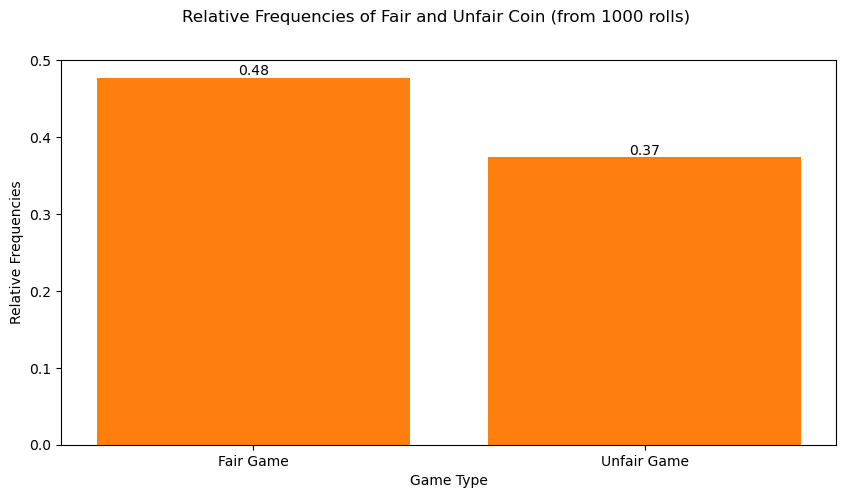

In [38]:
data = {'Method': ['Fair Game', 'Unfair Game'],
        'Relative_Frequencies': [fairanalyzer.jackpot()/1000, unfairanalyzer.jackpot()/1000]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
plt.bar(df.Method, df.Relative_Frequencies)
plt.ylabel('Relative Frequencies')
plt.xlabel('Game Type')
plt.suptitle('Relative Frequencies of Fair and Unfair Coin (from 1000 rolls)', fontsize='large')
for bar in plt.bar(df.Method, df.Relative_Frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [39]:
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [40]:
die1.change_weight(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [41]:
die2.change_weight(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [42]:
fairgame = Game([die3, die3, die3, die3, die3])
fairgame.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [43]:
unfairgame = Game([die1, die2, die3, die3, die3])
unfairgame.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [44]:
fairanalyzer = Analyzer(fairgame)
fairanalyzer.jackpot()/10000

0.0007

In [45]:
unfairanalyzer = Analyzer(unfairgame)
unfairanalyzer.jackpot()/10000

0.0004

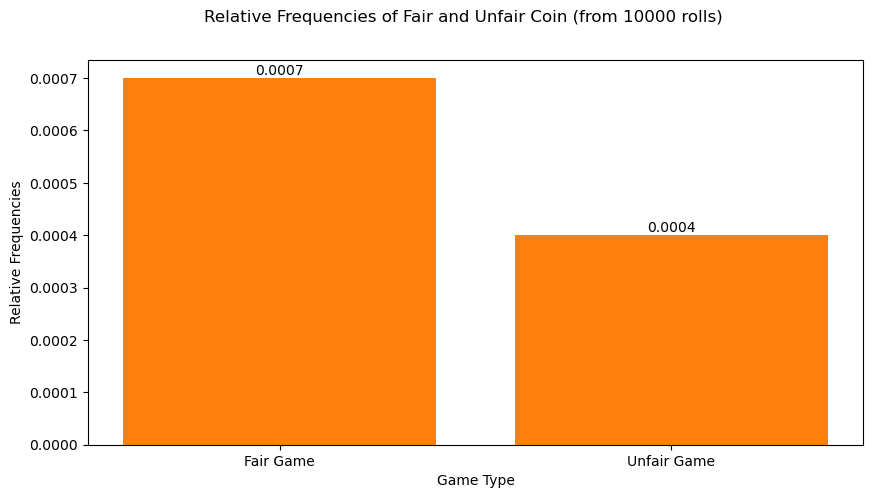

In [46]:
data = {'Method': ['Fair Game', 'Unfair Game'],
        'Relative_Frequencies': [fairanalyzer.jackpot()/10000, unfairanalyzer.jackpot()/10000]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
plt.bar(df.Method, df.Relative_Frequencies)
plt.ylabel('Relative Frequencies')
plt.xlabel('Game Type')
plt.suptitle('Relative Frequencies of Fair and Unfair Coin (from 10000 rolls)', fontsize='large')
for bar in plt.bar(df.Method, df.Relative_Frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [58]:
letters = pd.read_csv('english_letters.txt', delimiter = ' ', header=None)
letters = letters.set_index(0)
letters.head(10)

,1
0,
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975


In [59]:
alphabet = Die(np.array(letters.index))

In [60]:
for thisface in list(alphabet.get_state().index):
    thisweight = letters.loc[thisface, 1]
    alphabet.change_weight(thisface, thisweight)

In [55]:
alphabet.get_state()

,weights
faces,
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [56]:
game4 = Game([alphabet,alphabet,alphabet,alphabet])
game4.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [57]:
scrabble = pd.read_csv('scrabble_words.txt', header=None)
scrabble.head(10)

,0
0,AA
1,AAH
2,AAHED
3,AAHING
4,AAHS
5,AAL
6,AALII
7,AALIIS
8,AALS
9,AARDVARK


In [62]:
game4analyzer = Analyzer(game4)
game4analyzer.permutation_count()
len(game4analyzer.permutation_count().index.map("".join).intersection(scrabble[0]))

37

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [63]:
game5 = Game([alphabet,alphabet,alphabet,alphabet,alphabet])
game5.play(1000)
game5analyzer = Analyzer(game5)
game5analyzer.permutation_count()

,,,,,Count
A,L,A,V,G,1
N,H,D,B,C,1
U,G,I,U,I,1
I,H,L,E,Y,1
R,L,W,A,O,1
...,...,...,...,...,...
N,I,N,O,N,1
L,I,M,S,N,1
H,H,A,O,E,1
A,I,M,T,O,1


In [64]:
len(game5analyzer.permutation_count().index.map("".join).intersection(scrabble[0]))

9

The permutations of the game with 4 sets of the alphabet produces more words compared to the game with 5 sets of the alphabet.

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.